# Pandas

Pandas is a library for data analysis and manipulation. It sits on top of numpy, and uses all of the functionality that we learned already. Two very powerful tools within the pandas libraries are Series and Dataframes. To learn more about what's possible with pandas, check out their [site]('https://pandas.pydata.org'), and [documentation]('https://pandas.pydata.org/pandas-docs/stable/'). 

## Installation: 

If you've installed your environment via downloading anaconda, you likely already have pandas installed. To check, enter the below command into your console: 

`conda list | grep pandas`

Otherwise, if you're using pip, install pandas with the below command via your command line: 

`pip install pandas`

Now let's import the data. For the sake of not having to write pd.<whatever>, we'll be importing series, and dataframe separately from pandas (to save on typing): 

In [4]:
import numpy as np

import pandas as pd
from pandas import DataFrame
from pandas import Series



## Series

Series are a very powerful tool within pandas. Series are ultimately a wrapper on top of the numpy, but instead of just using arrays and matrices like in numpy, with series, we get to index our data. 

In [5]:
fibonacciNumbers = [0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

mySeries = Series(fibonacciNumbers)
print(mySeries)

0     0
1     1
2     1
3     2
4     3
5     5
6     8
7    13
8    21
9    34
dtype: int64


What's happening above is that we have a list that we're passing into series, and we're getting back an indexed list of fibonacci numbers. To access these numbers, we'll use the indices just like how we would use an array for now. Let's grab the 7th fibonacci number: 

In [6]:
mySeries[7]

13

It's not always the case that you'll want to have your series indexed by numbers though. Let's try being a bit more creative: 

In [7]:
pseudonyms = ["scary", "posh", "sporty", "ginger", "baby"]
names = ["Mel B", "Victoria Beckham", "Mel C", "Geri Halliwell", "Emma Bunton"]

spiceGirls = Series(names, index=pseudonyms)
spiceGirls

scary                Mel B
posh      Victoria Beckham
sporty               Mel C
ginger      Geri Halliwell
baby           Emma Bunton
dtype: object

Unlike arrays, we don't want grab any of our data by numerical index anymore because, while our numerical index exists, we've added new indices for easier access. Ultimately, think of our index now as a dictionary (from the intro to python notebook): 

In [8]:
spiceGirls[0]

'Mel B'

In [9]:
spiceGirls['scary']

'Mel B'

To find whether a specific person (or any key for that matter) is in a series, you need to use the `in` keyword: 

In [10]:
'posh' in spiceGirls

True

Given that our series is now acting entirely like a dictionary, it is actually possible to convert the series itself to a dictionary (granted, by doing so, you would be losing a lot of functionality): 

In [11]:
spiceGirlsDictionary = spiceGirls.to_dict()
spiceGirlsDictionary

{'scary': 'Mel B',
 'posh': 'Victoria Beckham',
 'sporty': 'Mel C',
 'ginger': 'Geri Halliwell',
 'baby': 'Emma Bunton'}

Since we can go from a series to a dictionary, it is also 100% the case that we can take any dictionary we have already created from somewhere else, and make a series out of it: 

In [12]:
beastieBoysDictionary = {
    "mikeD": "Michael Diamond", 
    "MCA": "Adam Yauch", 
    "Ad-Rock": "Adam Horovitz"
}

beastieBoySeries = Series(beastieBoysDictionary)
beastieBoySeries

mikeD      Michael Diamond
MCA             Adam Yauch
Ad-Rock      Adam Horovitz
dtype: object

Similar to being able to search for boolean values in numpy, we can do the same in series. Let's try it first with some numerical data (let's shift to age): 

In [13]:
nsyncAges = {
    "justinT": 38,
    "chrisK": 47,
    "joeyF": 42,
    "lanceB":  40,
    "jcC": 43
}

nsyncSeries = Series(nsyncAges)
nsyncSeries

justinT    38
chrisK     47
joeyF      42
lanceB     40
jcC        43
dtype: int64

In [14]:
olderThan40 = nsyncSeries > 40
olderThan40

justinT    False
chrisK      True
joeyF       True
lanceB     False
jcC         True
dtype: bool

In [15]:
nsyncSeries[olderThan40]

chrisK    47
joeyF     42
jcC       43
dtype: int64

It's also the case that you can add series together just like numpy arrays. By doing this, you're adding like to like: 

In [16]:
nsyncSeries + nsyncSeries

justinT    76
chrisK     94
joeyF      84
lanceB     80
jcC        86
dtype: int64

Let's take a look at that again, but this time without Justin Timberlake: 

In [17]:
nsyncAgesWithoutJT = {
    "chrisK": 47,
    "joeyF": 42,
    "lanceB":  40,
    "jcC": 43
}
nsyncMinusJT = Series(nsyncAgesWithoutJT)
nsyncMinusJT

chrisK    47
joeyF     42
lanceB    40
jcC       43
dtype: int64

Now let's add them together again to see what happens: 

In [18]:
newNsyncSeries = nsyncMinusJT + nsyncSeries
newNsyncSeries

chrisK     94.0
jcC        86.0
joeyF      84.0
justinT     NaN
lanceB     80.0
dtype: float64

Because we're adding like with like, what's happening is that because there is no `justinT` in the second series, we're trying to add 38 to a number that doesn't exist in the second, so we wind up with `NaN`

You'll often want to find whether data don't exist in a given series. To do that, you'll need to use the pandas `pd.isna()` function to get a boolean array: 

In [19]:
pd.isna(newNsyncSeries)

chrisK     False
jcC        False
joeyF      False
justinT     True
lanceB     False
dtype: bool

We can find the opposite with `pd.notna()`: 

In [20]:
pd.notna(newNsyncSeries)

chrisK      True
jcC         True
joeyF       True
justinT    False
lanceB      True
dtype: bool

Because we're getting a boolean array back, we can filter on that data: 

In [21]:
notMissingNsync = pd.notna(newNsyncSeries)

newNsyncSeries[notMissingNsync]

chrisK    94.0
jcC       86.0
joeyF     84.0
lanceB    80.0
dtype: float64

It's not always the case that you'll want to filter a series on a given number though. You can filter a series on anything that can return a truth value! Let's go back to beastie boys and filter on whether or not their names contain Adam. For this, we'll want to use the `seriesname.str.contains()` method: 

In [22]:
beastieBoySeries.str.contains('Adam')

mikeD      False
MCA         True
Ad-Rock     True
dtype: bool

In [23]:
namedAdam = beastieBoySeries.str.contains('Adam')

beastieBoySeries[namedAdam]

MCA           Adam Yauch
Ad-Rock    Adam Horovitz
dtype: object

Series are very powerful datastructures, however, it's unlikely you'll be coming across a singular series of data. Most datasets out there are extremely large with many different features! Let's take a look at DataFrames: 

## DataFrames

You can think of dataframes in multiple ways. I personally like to think of dataframes as a giant spreadsheet that's living in memory, and being powered by a series of series (think of how we had the numpy matrix). 

You can create your own dataframes in almost any number of ways. Let's take a look at creating our own from scratch, then we'll pull a dataframe from the internet: 

In [24]:
batmanDF = pd.DataFrame({
               'born': [pd.Timestamp('1952-10-13'), 
                        pd.Timestamp('1984-04-17'),
                        None, 
                        pd.Timestamp('1943-02-04')],
                'name': ['Alfred', 
                         'Bruce Wayne', 
                         '????', 
                         'Victor Fries'],
                'pseudonym': [None, 
                          'Batman', 
                          'Joker', 
                          'Mr. Freeze']})

batmanDF

,born,name,pseudonym
0,1952-10-13,Alfred,None
1,1984-04-17,Bruce Wayne,Batman
2,NaT,????,Joker
3,1943-02-04,Victor Fries,Mr. Freeze


In the above, we've created a very small dataframe from a dictionary with the keys as columns and their arrays as the row data (where the 0th index refers to Alfred, the 1st to Bruce Wayne, and so on). We can access each individual column by accessing its column name like a dictionary key: 

In [25]:
batmanDF['name']

0          Alfred
1     Bruce Wayne
2            ????
3    Victor Fries
Name: name, dtype: object

What makes pandas' dataframes so powerful is that we can use what we have learned with series and numpy and apply it to much larger datasets. Let's take a look when we get a boolean array from `batmanDF['name']` and apply it to our whole dataframe: 

In [26]:
isBruceWayne = batmanDF['name'] == 'Bruce Wayne'
isBruceWayne

0    False
1     True
2    False
3    False
Name: name, dtype: bool

In [27]:
batmanDF[isBruceWayne]

,born,name,pseudonym
1,1984-04-17,Bruce Wayne,Batman


What just happened above is that we got a boolean array that returned true on a single object, and then when applied to our dataframe, we got that specific row! Equally, we can do the exact opposite with a `!=` (and this time, we'll do everything inline): 

In [28]:
batmanDF[ batmanDF['name'] != 'Bruce Wayne' ]

,born,name,pseudonym
0,1952-10-13,Alfred,None
2,NaT,????,Joker
3,1943-02-04,Victor Fries,Mr. Freeze


Those are the very basics of DataFrames, let's get a little bit more involved with our dataframes by calling an api and getting some star wars character data. To get this data, we'll have to import `requests`.

To install requests, if you have anaconda installed you should already have it (otherwise, type `conda install requests`), and if you're using pip, just enter into the command line: 

`pip install requests` 

Then we import it! 

In [29]:
import requests

In [30]:
response = requests.get("https://swapi.dev/api/people/")
response

<Response [200]>

Now that we have our response data, we need to get it into a useable format. Luckily, pandas is really good at reading lots of formats, and can easily take in JSON format). If you're interested in learning more about JSON, check out their [webpage]('https://www.json.org').  


In [31]:
jsonResponse = response.json()
jsonResponse

{'count': 82,
 'next': 'https://swapi.dev/api/people/?page=2',
 'previous': None,
 'results': [{'name': 'Luke Skywalker',
   'height': '172',
   'mass': '77',
   'hair_color': 'blond',
   'skin_color': 'fair',
   'eye_color': 'blue',
   'birth_year': '19BBY',
   'gender': 'male',
   'homeworld': 'https://swapi.dev/api/planets/1/',
   'films': ['https://swapi.dev/api/films/1/',
    'https://swapi.dev/api/films/2/',
    'https://swapi.dev/api/films/3/',
    'https://swapi.dev/api/films/6/'],
   'species': [],
   'vehicles': ['https://swapi.dev/api/vehicles/14/',
    'https://swapi.dev/api/vehicles/30/'],
   'starships': ['https://swapi.dev/api/starships/12/',
    'https://swapi.dev/api/starships/22/'],
   'created': '2014-12-09T13:50:51.644000Z',
   'edited': '2014-12-20T21:17:56.891000Z',
   'url': 'https://swapi.dev/api/people/1/'},
  {'name': 'C-3PO',
   'height': '167',
   'mass': '75',
   'hair_color': 'n/a',
   'skin_color': 'gold',
   'eye_color': 'yellow',
   'birth_year': '112BB

In [32]:
jsonBody = jsonResponse["results"]
jsonBody

[{'name': 'Luke Skywalker',
  'height': '172',
  'mass': '77',
  'hair_color': 'blond',
  'skin_color': 'fair',
  'eye_color': 'blue',
  'birth_year': '19BBY',
  'gender': 'male',
  'homeworld': 'https://swapi.dev/api/planets/1/',
  'films': ['https://swapi.dev/api/films/1/',
   'https://swapi.dev/api/films/2/',
   'https://swapi.dev/api/films/3/',
   'https://swapi.dev/api/films/6/'],
  'species': [],
  'vehicles': ['https://swapi.dev/api/vehicles/14/',
   'https://swapi.dev/api/vehicles/30/'],
  'starships': ['https://swapi.dev/api/starships/12/',
   'https://swapi.dev/api/starships/22/'],
  'created': '2014-12-09T13:50:51.644000Z',
  'edited': '2014-12-20T21:17:56.891000Z',
  'url': 'https://swapi.dev/api/people/1/'},
 {'name': 'C-3PO',
  'height': '167',
  'mass': '75',
  'hair_color': 'n/a',
  'skin_color': 'gold',
  'eye_color': 'yellow',
  'birth_year': '112BBY',
  'gender': 'n/a',
  'homeworld': 'https://swapi.dev/api/planets/1/',
  'films': ['https://swapi.dev/api/films/1/',
 

In [33]:
starWarsDF = DataFrame(jsonBody)

If we had wanted to save the reseponse into a file and read it back into the dataframe from the file system, we'd want to use `pd.read_json`. 

Let's start dipping into our data and see what we got. 

In [34]:
starWarsDF.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],"[https://swapi.dev/api/vehicles/14/, https://s...","[https://swapi.dev/api/starships/12/, https://...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,https://swapi.dev/api/planets/8/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[https://swapi.dev/api/starships/13/],2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,https://swapi.dev/api/people/4/
4,Leia Organa,150,49,brown,light,brown,19BBY,female,https://swapi.dev/api/planets/2/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[https://swapi.dev/api/vehicles/30/],[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,https://swapi.dev/api/people/5/


There are a lot of data in this dataframe, so let's see what we've got going for us by just looking at the columns: 

In [35]:
starWarsDF.columns

Index(['name', 'height', 'mass', 'hair_color', 'skin_color', 'eye_color',
       'birth_year', 'gender', 'homeworld', 'films', 'species', 'vehicles',
       'starships', 'created', 'edited', 'url'],
      dtype='object')

Let's see how many characters we've receieved from our API call:

In [36]:
len(starWarsDF)

10

10 seems a little low for a series of multiple movies. Let's take a look at our whole dataframe: 

In [37]:
starWarsDF

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],"[https://swapi.dev/api/vehicles/14/, https://s...","[https://swapi.dev/api/starships/12/, https://...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,https://swapi.dev/api/planets/8/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[https://swapi.dev/api/starships/13/],2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,https://swapi.dev/api/people/4/
4,Leia Organa,150,49,brown,light,brown,19BBY,female,https://swapi.dev/api/planets/2/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[https://swapi.dev/api/vehicles/30/],[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,https://swapi.dev/api/people/5/
5,Owen Lars,178,120,"brown, grey",light,blue,52BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[],2014-12-10T15:52:14.024000Z,2014-12-20T21:17:50.317000Z,https://swapi.dev/api/people/6/
6,Beru Whitesun lars,165,75,brown,light,blue,47BBY,female,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[],2014-12-10T15:53:41.121000Z,2014-12-20T21:17:50.319000Z,https://swapi.dev/api/people/7/
7,R5-D4,97,32,n/a,"white, red",red,unknown,n/a,https://swapi.dev/api/planets/1/,[https://swapi.dev/api/films/1/],[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:57:50.959000Z,2014-12-20T21:17:50.321000Z,https://swapi.dev/api/people/8/
8,Biggs Darklighter,183,84,black,light,brown,24BBY,male,https://swapi.dev/api/planets/1/,[https://swapi.dev/api/films/1/],[],[],[https://swapi.dev/api/starships/12/],2014-12-10T15:59:50.509000Z,2014-12-20T21:17:50.323000Z,https://swapi.dev/api/people/9/
9,Obi-Wan Kenobi,182,77,"auburn, white",fair,blue-gray,57BBY,male,https://swapi.dev/api/planets/20/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[https://swapi.dev/api/vehicles/38/],"[https://swapi.dev/api/starships/48/, https://...",2014-12-10T16:16:29.192000Z,2014-12-20T21:17:50.325000Z,https://swapi.dev/api/people/10/


It's a little hard to suss through all of the above dataframe, so let's just see what specific characters we've recieved from the api call: 

In [38]:
starWarsDF['name']

0        Luke Skywalker
1                 C-3PO
2                 R2-D2
3           Darth Vader
4           Leia Organa
5             Owen Lars
6    Beru Whitesun lars
7                 R5-D4
8     Biggs Darklighter
9        Obi-Wan Kenobi
Name: name, dtype: object

Clearly we didn't grab every single star wars character in the entire saga. Let's take a look at our response again just to make sure of what we're getting: 

In [39]:
jsonResponse

{'count': 82,
 'next': 'https://swapi.dev/api/people/?page=2',
 'previous': None,
 'results': [{'name': 'Luke Skywalker',
   'height': '172',
   'mass': '77',
   'hair_color': 'blond',
   'skin_color': 'fair',
   'eye_color': 'blue',
   'birth_year': '19BBY',
   'gender': 'male',
   'homeworld': 'https://swapi.dev/api/planets/1/',
   'films': ['https://swapi.dev/api/films/1/',
    'https://swapi.dev/api/films/2/',
    'https://swapi.dev/api/films/3/',
    'https://swapi.dev/api/films/6/'],
   'species': [],
   'vehicles': ['https://swapi.dev/api/vehicles/14/',
    'https://swapi.dev/api/vehicles/30/'],
   'starships': ['https://swapi.dev/api/starships/12/',
    'https://swapi.dev/api/starships/22/'],
   'created': '2014-12-09T13:50:51.644000Z',
   'edited': '2014-12-20T21:17:56.891000Z',
   'url': 'https://swapi.dev/api/people/1/'},
  {'name': 'C-3PO',
   'height': '167',
   'mass': '75',
   'hair_color': 'n/a',
   'skin_color': 'gold',
   'eye_color': 'yellow',
   'birth_year': '112BB

It's always good to double check what's in our data before we start working with it! We can see that there are 87 characters, but we only grabbed 10 in our dataframe. There's one key that we should absolutely take note of, and that's the `next` key. In order to keep our api calls quick, the data have been paginated into segments of 10 characters, so we'll need to make 9 calls in total! First, let's make a call to see what the next page is: 

In [40]:
nextPageURI = jsonResponse["next"]
nextPageURI

'https://swapi.dev/api/people/?page=2'

In [41]:
nextPage = requests.get(nextPageURI)
nextPage

<Response [200]>

In [42]:
nextPageJSON = nextPage.json()
nextPageJSON

{'count': 82,
 'next': 'https://swapi.dev/api/people/?page=3',
 'previous': 'https://swapi.dev/api/people/?page=1',
 'results': [{'name': 'Anakin Skywalker',
   'height': '188',
   'mass': '84',
   'hair_color': 'blond',
   'skin_color': 'fair',
   'eye_color': 'blue',
   'birth_year': '41.9BBY',
   'gender': 'male',
   'homeworld': 'https://swapi.dev/api/planets/1/',
   'films': ['https://swapi.dev/api/films/4/',
    'https://swapi.dev/api/films/5/',
    'https://swapi.dev/api/films/6/'],
   'species': [],
   'vehicles': ['https://swapi.dev/api/vehicles/44/',
    'https://swapi.dev/api/vehicles/46/'],
   'starships': ['https://swapi.dev/api/starships/39/',
    'https://swapi.dev/api/starships/59/',
    'https://swapi.dev/api/starships/65/'],
   'created': '2014-12-10T16:20:44.310000Z',
   'edited': '2014-12-20T21:17:50.327000Z',
   'url': 'https://swapi.dev/api/people/11/'},
  {'name': 'Wilhuff Tarkin',
   'height': '180',
   'mass': 'unknown',
   'hair_color': 'auburn, grey',
   'ski

So, now we've got a whole new page of new materials! Let's add it to a dataframe and combine the two! 

In [43]:
secondPageDataframe = DataFrame(nextPageJSON['results'])
secondPageDataframe.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
0,Anakin Skywalker,188,84,blond,fair,blue,41.9BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/4/, https://swapi...",[],"[https://swapi.dev/api/vehicles/44/, https://s...","[https://swapi.dev/api/starships/39/, https://...",2014-12-10T16:20:44.310000Z,2014-12-20T21:17:50.327000Z,https://swapi.dev/api/people/11/
1,Wilhuff Tarkin,180,unknown,"auburn, grey",fair,blue,64BBY,male,https://swapi.dev/api/planets/21/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[],2014-12-10T16:26:56.138000Z,2014-12-20T21:17:50.330000Z,https://swapi.dev/api/people/12/
2,Chewbacca,228,112,brown,unknown,blue,200BBY,male,https://swapi.dev/api/planets/14/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/3/],[https://swapi.dev/api/vehicles/19/],"[https://swapi.dev/api/starships/10/, https://...",2014-12-10T16:42:45.066000Z,2014-12-20T21:17:50.332000Z,https://swapi.dev/api/people/13/
3,Han Solo,180,80,brown,fair,brown,29BBY,male,https://swapi.dev/api/planets/22/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],"[https://swapi.dev/api/starships/10/, https://...",2014-12-10T16:49:14.582000Z,2014-12-20T21:17:50.334000Z,https://swapi.dev/api/people/14/
4,Greedo,173,74,n/a,green,black,44BBY,male,https://swapi.dev/api/planets/23/,[https://swapi.dev/api/films/1/],[https://swapi.dev/api/species/4/],[],[],2014-12-10T17:03:30.334000Z,2014-12-20T21:17:50.336000Z,https://swapi.dev/api/people/15/


To add two dataframes together, we can just concatenate them by placing each of them as an element in an array, and concatenating the array. Let's take a look at both, then concatenate them to see what we get: 

In [44]:
starWarsDF

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],"[https://swapi.dev/api/vehicles/14/, https://s...","[https://swapi.dev/api/starships/12/, https://...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,https://swapi.dev/api/planets/8/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[https://swapi.dev/api/starships/13/],2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,https://swapi.dev/api/people/4/
4,Leia Organa,150,49,brown,light,brown,19BBY,female,https://swapi.dev/api/planets/2/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[https://swapi.dev/api/vehicles/30/],[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,https://swapi.dev/api/people/5/
5,Owen Lars,178,120,"brown, grey",light,blue,52BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[],2014-12-10T15:52:14.024000Z,2014-12-20T21:17:50.317000Z,https://swapi.dev/api/people/6/
6,Beru Whitesun lars,165,75,brown,light,blue,47BBY,female,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[],2014-12-10T15:53:41.121000Z,2014-12-20T21:17:50.319000Z,https://swapi.dev/api/people/7/
7,R5-D4,97,32,n/a,"white, red",red,unknown,n/a,https://swapi.dev/api/planets/1/,[https://swapi.dev/api/films/1/],[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:57:50.959000Z,2014-12-20T21:17:50.321000Z,https://swapi.dev/api/people/8/
8,Biggs Darklighter,183,84,black,light,brown,24BBY,male,https://swapi.dev/api/planets/1/,[https://swapi.dev/api/films/1/],[],[],[https://swapi.dev/api/starships/12/],2014-12-10T15:59:50.509000Z,2014-12-20T21:17:50.323000Z,https://swapi.dev/api/people/9/
9,Obi-Wan Kenobi,182,77,"auburn, white",fair,blue-gray,57BBY,male,https://swapi.dev/api/planets/20/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[https://swapi.dev/api/vehicles/38/],"[https://swapi.dev/api/starships/48/, https://...",2014-12-10T16:16:29.192000Z,2014-12-20T21:17:50.325000Z,https://swapi.dev/api/people/10/


In [45]:
secondPageDataframe

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
0,Anakin Skywalker,188,84,blond,fair,blue,41.9BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/4/, https://swapi...",[],"[https://swapi.dev/api/vehicles/44/, https://s...","[https://swapi.dev/api/starships/39/, https://...",2014-12-10T16:20:44.310000Z,2014-12-20T21:17:50.327000Z,https://swapi.dev/api/people/11/
1,Wilhuff Tarkin,180,unknown,"auburn, grey",fair,blue,64BBY,male,https://swapi.dev/api/planets/21/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[],2014-12-10T16:26:56.138000Z,2014-12-20T21:17:50.330000Z,https://swapi.dev/api/people/12/
2,Chewbacca,228,112,brown,unknown,blue,200BBY,male,https://swapi.dev/api/planets/14/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/3/],[https://swapi.dev/api/vehicles/19/],"[https://swapi.dev/api/starships/10/, https://...",2014-12-10T16:42:45.066000Z,2014-12-20T21:17:50.332000Z,https://swapi.dev/api/people/13/
3,Han Solo,180,80,brown,fair,brown,29BBY,male,https://swapi.dev/api/planets/22/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],"[https://swapi.dev/api/starships/10/, https://...",2014-12-10T16:49:14.582000Z,2014-12-20T21:17:50.334000Z,https://swapi.dev/api/people/14/
4,Greedo,173,74,n/a,green,black,44BBY,male,https://swapi.dev/api/planets/23/,[https://swapi.dev/api/films/1/],[https://swapi.dev/api/species/4/],[],[],2014-12-10T17:03:30.334000Z,2014-12-20T21:17:50.336000Z,https://swapi.dev/api/people/15/
5,Jabba Desilijic Tiure,175,"1,358",n/a,"green-tan, brown",orange,600BBY,hermaphrodite,https://swapi.dev/api/planets/24/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/5/],[],[],2014-12-10T17:11:31.638000Z,2014-12-20T21:17:50.338000Z,https://swapi.dev/api/people/16/
6,Wedge Antilles,170,77,brown,fair,hazel,21BBY,male,https://swapi.dev/api/planets/22/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[https://swapi.dev/api/vehicles/14/],[https://swapi.dev/api/starships/12/],2014-12-12T11:08:06.469000Z,2014-12-20T21:17:50.341000Z,https://swapi.dev/api/people/18/
7,Jek Tono Porkins,180,110,brown,fair,blue,unknown,male,https://swapi.dev/api/planets/26/,[https://swapi.dev/api/films/1/],[],[],[https://swapi.dev/api/starships/12/],2014-12-12T11:16:56.569000Z,2014-12-20T21:17:50.343000Z,https://swapi.dev/api/people/19/
8,Yoda,66,17,white,green,brown,896BBY,male,https://swapi.dev/api/planets/28/,"[https://swapi.dev/api/films/2/, https://swapi...",[https://swapi.dev/api/species/6/],[],[],2014-12-15T12:26:01.042000Z,2014-12-20T21:17:50.345000Z,https://swapi.dev/api/people/20/
9,Palpatine,170,75,grey,pale,yellow,82BBY,male,https://swapi.dev/api/planets/8/,"[https://swapi.dev/api/films/2/, https://swapi...",[],[],[],2014-12-15T12:48:05.971000Z,2014-12-20T21:17:50.347000Z,https://swapi.dev/api/people/21/


In [46]:
dataFrameList = [ starWarsDF, secondPageDataframe ]

In [47]:
superList = pd.concat(dataFrameList)

In [48]:
superList

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],"[https://swapi.dev/api/vehicles/14/, https://s...","[https://swapi.dev/api/starships/12/, https://...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,https://swapi.dev/api/planets/8/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[https://swapi.dev/api/starships/13/],2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,https://swapi.dev/api/people/4/
4,Leia Organa,150,49,brown,light,brown,19BBY,female,https://swapi.dev/api/planets/2/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[https://swapi.dev/api/vehicles/30/],[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,https://swapi.dev/api/people/5/
5,Owen Lars,178,120,"brown, grey",light,blue,52BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[],2014-12-10T15:52:14.024000Z,2014-12-20T21:17:50.317000Z,https://swapi.dev/api/people/6/
6,Beru Whitesun lars,165,75,brown,light,blue,47BBY,female,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[],2014-12-10T15:53:41.121000Z,2014-12-20T21:17:50.319000Z,https://swapi.dev/api/people/7/
7,R5-D4,97,32,n/a,"white, red",red,unknown,n/a,https://swapi.dev/api/planets/1/,[https://swapi.dev/api/films/1/],[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:57:50.959000Z,2014-12-20T21:17:50.321000Z,https://swapi.dev/api/people/8/
8,Biggs Darklighter,183,84,black,light,brown,24BBY,male,https://swapi.dev/api/planets/1/,[https://swapi.dev/api/films/1/],[],[],[https://swapi.dev/api/starships/12/],2014-12-10T15:59:50.509000Z,2014-12-20T21:17:50.323000Z,https://swapi.dev/api/people/9/
9,Obi-Wan Kenobi,182,77,"auburn, white",fair,blue-gray,57BBY,male,https://swapi.dev/api/planets/20/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[https://swapi.dev/api/vehicles/38/],"[https://swapi.dev/api/starships/48/, https://...",2014-12-10T16:16:29.192000Z,2014-12-20T21:17:50.325000Z,https://swapi.dev/api/people/10/


We've now got two dataframes converged into one! This means we can do the same for every single page! Though, first, before we move forward with getting the rest, look closely at the indices of the new dataframe. We have repeating indices of each dataframe. It's not ideal to have multiple values with the same index, so let's reindex these values with the method `reset_index`: 

In [49]:
superList.reset_index()

,index,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
0,0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],"[https://swapi.dev/api/vehicles/14/, https://s...","[https://swapi.dev/api/starships/12/, https://...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
1,1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/
2,2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,https://swapi.dev/api/planets/8/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/
3,3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[https://swapi.dev/api/starships/13/],2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,https://swapi.dev/api/people/4/
4,4,Leia Organa,150,49,brown,light,brown,19BBY,female,https://swapi.dev/api/planets/2/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[https://swapi.dev/api/vehicles/30/],[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,https://swapi.dev/api/people/5/
5,5,Owen Lars,178,120,"brown, grey",light,blue,52BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[],2014-12-10T15:52:14.024000Z,2014-12-20T21:17:50.317000Z,https://swapi.dev/api/people/6/
6,6,Beru Whitesun lars,165,75,brown,light,blue,47BBY,female,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[],2014-12-10T15:53:41.121000Z,2014-12-20T21:17:50.319000Z,https://swapi.dev/api/people/7/
7,7,R5-D4,97,32,n/a,"white, red",red,unknown,n/a,https://swapi.dev/api/planets/1/,[https://swapi.dev/api/films/1/],[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:57:50.959000Z,2014-12-20T21:17:50.321000Z,https://swapi.dev/api/people/8/
8,8,Biggs Darklighter,183,84,black,light,brown,24BBY,male,https://swapi.dev/api/planets/1/,[https://swapi.dev/api/films/1/],[],[],[https://swapi.dev/api/starships/12/],2014-12-10T15:59:50.509000Z,2014-12-20T21:17:50.323000Z,https://swapi.dev/api/people/9/
9,9,Obi-Wan Kenobi,182,77,"auburn, white",fair,blue-gray,57BBY,male,https://swapi.dev/api/planets/20/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[https://swapi.dev/api/vehicles/38/],"[https://swapi.dev/api/starships/48/, https://...",2014-12-10T16:16:29.192000Z,2014-12-20T21:17:50.325000Z,https://swapi.dev/api/people/10/


We've reset our index, however, notice that we've stored the old index in our dataframe now. It's not always the case that you'll want to overwrite the dataframe's indices, so you might want to keep them, but for our sake, we do want to overwrite, so let's give it a go with the parameter `drop` set to `True`: 

In [50]:
resetIndexDataFrame = superList.reset_index(drop=True)
resetIndexDataFrame

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],"[https://swapi.dev/api/vehicles/14/, https://s...","[https://swapi.dev/api/starships/12/, https://...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,https://swapi.dev/api/planets/8/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[https://swapi.dev/api/starships/13/],2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,https://swapi.dev/api/people/4/
4,Leia Organa,150,49,brown,light,brown,19BBY,female,https://swapi.dev/api/planets/2/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[https://swapi.dev/api/vehicles/30/],[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,https://swapi.dev/api/people/5/
5,Owen Lars,178,120,"brown, grey",light,blue,52BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[],2014-12-10T15:52:14.024000Z,2014-12-20T21:17:50.317000Z,https://swapi.dev/api/people/6/
6,Beru Whitesun lars,165,75,brown,light,blue,47BBY,female,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[],2014-12-10T15:53:41.121000Z,2014-12-20T21:17:50.319000Z,https://swapi.dev/api/people/7/
7,R5-D4,97,32,n/a,"white, red",red,unknown,n/a,https://swapi.dev/api/planets/1/,[https://swapi.dev/api/films/1/],[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:57:50.959000Z,2014-12-20T21:17:50.321000Z,https://swapi.dev/api/people/8/
8,Biggs Darklighter,183,84,black,light,brown,24BBY,male,https://swapi.dev/api/planets/1/,[https://swapi.dev/api/films/1/],[],[],[https://swapi.dev/api/starships/12/],2014-12-10T15:59:50.509000Z,2014-12-20T21:17:50.323000Z,https://swapi.dev/api/people/9/
9,Obi-Wan Kenobi,182,77,"auburn, white",fair,blue-gray,57BBY,male,https://swapi.dev/api/planets/20/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[https://swapi.dev/api/vehicles/38/],"[https://swapi.dev/api/starships/48/, https://...",2014-12-10T16:16:29.192000Z,2014-12-20T21:17:50.325000Z,https://swapi.dev/api/people/10/


Now everything's set back to a `0-(n-1)` list. We could keep doing this over and over again for our API calls, however, it's not really efficient. In order to not do this over and over ad infinitum, we want to automate the tedious things! Let's create a function that can iterate over the entire list and make consecutive calls, ultimately returning to us a list of dataframes (that we can then use to concat and reset our indices): 

In [51]:
def makeTheCallsAndReturnTheWholeList():
    nextURI = "https://swapi.dev/api/people/" 
    dataFrameList = list()


    while(nextURI): 
        response = requests.get(nextURI)
        jsonResponse = response.json()

        nextURI = jsonResponse['next']
        jsonBody = jsonResponse["results"]

        dataFrame = DataFrame(jsonBody)
        dataFrameList.append(dataFrame)
        
    
    wholeDataFrame = pd.concat(dataFrameList)
    resetIndexDF = wholeDataFrame.reset_index(drop=True)
    return resetIndexDF
    

In [52]:
starWarsDataFrame = makeTheCallsAndReturnTheWholeList()

Let's doublecheck that we've actually got all 82 of our characters. We know from the jsonResponse that we're supposed to have 82. Let's double check with `len()`: 

In [53]:
len(starWarsDataFrame)

82

Before we go any further, let's also double check that we've made the right calls and that we've got a unique list of star wars characters! 

In [54]:
uniqueNames = starWarsDataFrame['name'].unique()
len(uniqueNames)

82

Now, before we move on, let's take a moment to refactor some code. Our function above is great, but it's very likely we'll want to use some of what we used above later on, so let's refactor! Our function origionally looked like: 

```python
def makeTheCallsAndReturnTheWholeList():
    nextURI = "https://swapi.dev/api/people/" 
    dataFrameList = list()


    while(nextURI): 
        response = requests.get(nextURI)
        jsonResponse = response.json()

        nextURI = jsonResponse['next']
        jsonBody = jsonResponse["results"]

        dataFrame = DataFrame(jsonBody)
        dataFrameList.append(dataFrame)
        
    
    wholeDataFrame = pd.concat(dataFrameList)
    resetIndexDF = wholeDataFrame.reset_index(drop=True)
    return resetIndexDF
```

There are two things our function is doing: 
    1. Making a call and getting a body of information back
    2. Concatenating the list of dataframes together. 
    
Let's start with the making the call and retrieving the json body and the next URI: 

In [55]:
def getResponseBodyAndNext(URI):
    response = requests.get(URI)
    jsonResponse = response.json()

    nextURI = jsonResponse['next']
    jsonBody = jsonResponse["results"]
    
    return (jsonBody, nextURI)

Now let's try to see if this function works: 

In [56]:
(filmList, nextURI) = getResponseBodyAndNext('https://swapi.dev/api/films')

In [57]:
filmList

[{'title': 'A New Hope',
  'episode_id': 4,
  'opening_crawl': "It is a period of civil war.\r\nRebel spaceships, striking\r\nfrom a hidden base, have won\r\ntheir first victory against\r\nthe evil Galactic Empire.\r\n\r\nDuring the battle, Rebel\r\nspies managed to steal secret\r\nplans to the Empire's\r\nultimate weapon, the DEATH\r\nSTAR, an armored space\r\nstation with enough power\r\nto destroy an entire planet.\r\n\r\nPursued by the Empire's\r\nsinister agents, Princess\r\nLeia races home aboard her\r\nstarship, custodian of the\r\nstolen plans that can save her\r\npeople and restore\r\nfreedom to the galaxy....",
  'director': 'George Lucas',
  'producer': 'Gary Kurtz, Rick McCallum',
  'release_date': '1977-05-25',
  'characters': ['https://swapi.dev/api/people/1/',
   'https://swapi.dev/api/people/2/',
   'https://swapi.dev/api/people/3/',
   'https://swapi.dev/api/people/4/',
   'https://swapi.dev/api/people/5/',
   'https://swapi.dev/api/people/6/',
   'https://swapi.dev/ap

Now that we know our first function works, let's redefine our function so it looks a little cleaner: 

In [58]:
def makeTheCallsAndReturnTheWholeList(nextURI):
    dataFrameList = list()

    while(nextURI): 
        (jsonBody, nextURI) = getResponseBodyAndNext(nextURI)
        dataFrame = DataFrame(jsonBody)
        dataFrameList.append(dataFrame)

    wholeDataFrame = pd.concat(dataFrameList)
    resetIndexDF = wholeDataFrame.reset_index(drop=True)
    return resetIndexDF

Let's double check to see if our function works: 

In [59]:
starWarsPeopleTest = makeTheCallsAndReturnTheWholeList("https://swapi.dev/api/people/")
starWarsPeopleTest

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],"[https://swapi.dev/api/vehicles/14/, https://s...","[https://swapi.dev/api/starships/12/, https://...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,https://swapi.dev/api/planets/8/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[https://swapi.dev/api/starships/13/],2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,https://swapi.dev/api/people/4/
4,Leia Organa,150,49,brown,light,brown,19BBY,female,https://swapi.dev/api/planets/2/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[https://swapi.dev/api/vehicles/30/],[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,https://swapi.dev/api/people/5/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Grievous,216,159,none,"brown, white","green, yellow",unknown,male,https://swapi.dev/api/planets/59/,[https://swapi.dev/api/films/6/],[https://swapi.dev/api/species/36/],[https://swapi.dev/api/vehicles/60/],[https://swapi.dev/api/starships/74/],2014-12-20T19:43:53.348000Z,2014-12-20T21:17:50.488000Z,https://swapi.dev/api/people/79/
78,Tarfful,234,136,brown,brown,blue,unknown,male,https://swapi.dev/api/planets/14/,[https://swapi.dev/api/films/6/],[https://swapi.dev/api/species/3/],[],[],2014-12-20T19:46:34.209000Z,2014-12-20T21:17:50.491000Z,https://swapi.dev/api/people/80/
79,Raymus Antilles,188,79,brown,light,brown,unknown,male,https://swapi.dev/api/planets/2/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[],2014-12-20T19:49:35.583000Z,2014-12-20T21:17:50.493000Z,https://swapi.dev/api/people/81/
80,Sly Moore,178,48,none,pale,white,unknown,female,https://swapi.dev/api/planets/60/,"[https://swapi.dev/api/films/5/, https://swapi...",[],[],[],2014-12-20T20:18:37.619000Z,2014-12-20T21:17:50.496000Z,https://swapi.dev/api/people/82/


Now we've got our setup done, let's take a look at what's in our dataset: 

In [60]:
starWarsDataFrame.columns

Index(['name', 'height', 'mass', 'hair_color', 'skin_color', 'eye_color',
       'birth_year', 'gender', 'homeworld', 'films', 'species', 'vehicles',
       'starships', 'created', 'edited', 'url'],
      dtype='object')

It's not always the case that you'll be wanting all of the data that come from an api (for our purposes, we don't even care about metadata such as "created and edited"), so let's drop a couple of columns. The axis parameter is specifying whether or not we want to drop a specific column index, or a specific row index: 

In [61]:
starWarsDF.drop(['created'], axis=1)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,edited,url
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],"[https://swapi.dev/api/vehicles/14/, https://s...","[https://swapi.dev/api/starships/12/, https://...",2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,https://swapi.dev/api/planets/8/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[https://swapi.dev/api/starships/13/],2014-12-20T21:17:50.313000Z,https://swapi.dev/api/people/4/
4,Leia Organa,150,49,brown,light,brown,19BBY,female,https://swapi.dev/api/planets/2/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[https://swapi.dev/api/vehicles/30/],[],2014-12-20T21:17:50.315000Z,https://swapi.dev/api/people/5/
5,Owen Lars,178,120,"brown, grey",light,blue,52BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[],2014-12-20T21:17:50.317000Z,https://swapi.dev/api/people/6/
6,Beru Whitesun lars,165,75,brown,light,blue,47BBY,female,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[],2014-12-20T21:17:50.319000Z,https://swapi.dev/api/people/7/
7,R5-D4,97,32,n/a,"white, red",red,unknown,n/a,https://swapi.dev/api/planets/1/,[https://swapi.dev/api/films/1/],[https://swapi.dev/api/species/2/],[],[],2014-12-20T21:17:50.321000Z,https://swapi.dev/api/people/8/
8,Biggs Darklighter,183,84,black,light,brown,24BBY,male,https://swapi.dev/api/planets/1/,[https://swapi.dev/api/films/1/],[],[],[https://swapi.dev/api/starships/12/],2014-12-20T21:17:50.323000Z,https://swapi.dev/api/people/9/
9,Obi-Wan Kenobi,182,77,"auburn, white",fair,blue-gray,57BBY,male,https://swapi.dev/api/planets/20/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[https://swapi.dev/api/vehicles/38/],"[https://swapi.dev/api/starships/48/, https://...",2014-12-20T21:17:50.325000Z,https://swapi.dev/api/people/10/


You might be likely to think that since we've called "drop" we therefore have dropped the dataframe. You'd be wrong. Pandas functions don't typically follow in-place mutations, and follow a generally functional framework. You can work with this in multiple ways: 

1. You can create a brand new dataframe (recommended)
2. You can use the inplace parameter. 
3. You can self assign the dataframe after the function call (but this is not recommended)

If you are going to mutate your dataframe, I'd recommend using the inplace modifier. 

Two things of note below: 
1. Notice that instead of one column, we're now sending in two? The column list is an array and can take as many columns as you can put in.
2. We're going to be using the inplace parameter set to true, so that that once we call the funciton we will be dropping our columns. 

In [62]:
starWarsDF.drop(['created', 'edited'], axis=1, inplace=True)

In [63]:
starWarsDF.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,url
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],"[https://swapi.dev/api/vehicles/14/, https://s...","[https://swapi.dev/api/starships/12/, https://...",https://swapi.dev/api/people/1/
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],https://swapi.dev/api/people/2/
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,https://swapi.dev/api/planets/8/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],https://swapi.dev/api/people/3/
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[https://swapi.dev/api/starships/13/],https://swapi.dev/api/people/4/
4,Leia Organa,150,49,brown,light,brown,19BBY,female,https://swapi.dev/api/planets/2/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[https://swapi.dev/api/vehicles/30/],[],https://swapi.dev/api/people/5/


Now, we've removed the metadata for the dataframe, let's take a look at some of our other data. Notice that some of our data are actually urls: 

In [64]:
starWarsDF[['films', 'homeworld', 'species', 'starships', 'vehicles']]

,films,homeworld,species,starships,vehicles
0,"[https://swapi.dev/api/films/1/, https://swapi...",https://swapi.dev/api/planets/1/,[],"[https://swapi.dev/api/starships/12/, https://...","[https://swapi.dev/api/vehicles/14/, https://s..."
1,"[https://swapi.dev/api/films/1/, https://swapi...",https://swapi.dev/api/planets/1/,[https://swapi.dev/api/species/2/],[],[]
2,"[https://swapi.dev/api/films/1/, https://swapi...",https://swapi.dev/api/planets/8/,[https://swapi.dev/api/species/2/],[],[]
3,"[https://swapi.dev/api/films/1/, https://swapi...",https://swapi.dev/api/planets/1/,[],[https://swapi.dev/api/starships/13/],[]
4,"[https://swapi.dev/api/films/1/, https://swapi...",https://swapi.dev/api/planets/2/,[],[],[https://swapi.dev/api/vehicles/30/]
5,"[https://swapi.dev/api/films/1/, https://swapi...",https://swapi.dev/api/planets/1/,[],[],[]
6,"[https://swapi.dev/api/films/1/, https://swapi...",https://swapi.dev/api/planets/1/,[],[],[]
7,[https://swapi.dev/api/films/1/],https://swapi.dev/api/planets/1/,[https://swapi.dev/api/species/2/],[],[]
8,[https://swapi.dev/api/films/1/],https://swapi.dev/api/planets/1/,[],[https://swapi.dev/api/starships/12/],[]
9,"[https://swapi.dev/api/films/1/, https://swapi...",https://swapi.dev/api/planets/20/,[],"[https://swapi.dev/api/starships/48/, https://...",[https://swapi.dev/api/vehicles/38/]


In order to work with this data, we'll need an example of each: 

In [65]:
filmUrl = starWarsDataFrame['films'][0][0]
filmUrl

'https://swapi.dev/api/films/1/'

In [66]:
getResponseBodyAndNext(filmUrl)

KeyError: 'next'

Looks like we've run into a potential problem. Not every response from the api will return a next. In many language, that'll just return with a null, however, python will crash if we try to access a key that isn't there. Let's iterate on our method and use a special library called pydash (very similar to lodash for javascript). 

In order to get pydash, we'll have to install it (it is not part of the conda install). To properly install it (if you have anaconda installed), write: 

```conda install -c conda-forge pydash```

If you have not installed anaconda, you can install pydash by typing: 

``` pip install pydash ```


Once finished installing pydash, you can import it like any other package. For our purposes, however, we'll only be using the `get` method: 

In [67]:
from pydash import get

pydash get is a method that allows for us to safely retrieve data. If that data does not exist, you can specify a default value to return without worry for your program crashing: 

In [68]:
def getResponseBodyAndNext(URI):
    response = requests.get(URI)
    jsonResponse = response.json()

    nextURI = get(jsonResponse, 'next', None) # safely get next
    jsonBody = jsonResponse["results"]
    
    return (jsonBody, nextURI)

Now let's try to safely run our data: 

In [69]:
filmUrl = starWarsDataFrame['films'][0][0]
getResponseBodyAndNext(filmUrl)

KeyError: 'results'

Now we're seeing a key error! That can mean many things, let's take a look at the data and change up our function.


In [70]:
def getResponseBodyAndNext(URI):
    response = requests.get(URI)
    jsonResponse = response.json()
    print("JSON?", jsonResponse)

    nextURI = get(jsonResponse, 'next', None) # safely get next
    jsonBody = jsonResponse["results"]
    
    return (jsonBody, nextURI)

In [71]:
getResponseBodyAndNext(filmUrl)

JSON? {'title': 'A New Hope', 'episode_id': 4, 'opening_crawl': "It is a period of civil war.\r\nRebel spaceships, striking\r\nfrom a hidden base, have won\r\ntheir first victory against\r\nthe evil Galactic Empire.\r\n\r\nDuring the battle, Rebel\r\nspies managed to steal secret\r\nplans to the Empire's\r\nultimate weapon, the DEATH\r\nSTAR, an armored space\r\nstation with enough power\r\nto destroy an entire planet.\r\n\r\nPursued by the Empire's\r\nsinister agents, Princess\r\nLeia races home aboard her\r\nstarship, custodian of the\r\nstolen plans that can save her\r\npeople and restore\r\nfreedom to the galaxy....", 'director': 'George Lucas', 'producer': 'Gary Kurtz, Rick McCallum', 'release_date': '1977-05-25', 'characters': ['https://swapi.dev/api/people/1/', 'https://swapi.dev/api/people/2/', 'https://swapi.dev/api/people/3/', 'https://swapi.dev/api/people/4/', 'https://swapi.dev/api/people/5/', 'https://swapi.dev/api/people/6/', 'https://swapi.dev/api/people/7/', 'https://sw

KeyError: 'results'

From the above, we can see that our JSON response does not have list data like the character response. So now we just need to add a bit of code to handle that too with the "isinstance" function: 

In [72]:
def getResponseBodyAndNext(URI):
    response = requests.get(URI)
    jsonResponse = response.json()

    nextURI = get(jsonResponse, 'next', None) # safely get next
    jsonBody = get(get(jsonResponse, 'results')) if isinstance(jsonResponse, list) else jsonResponse
    
    return (jsonBody, nextURI)

In [73]:
getResponseBodyAndNext(filmUrl)

({'title': 'A New Hope',
  'episode_id': 4,
  'opening_crawl': "It is a period of civil war.\r\nRebel spaceships, striking\r\nfrom a hidden base, have won\r\ntheir first victory against\r\nthe evil Galactic Empire.\r\n\r\nDuring the battle, Rebel\r\nspies managed to steal secret\r\nplans to the Empire's\r\nultimate weapon, the DEATH\r\nSTAR, an armored space\r\nstation with enough power\r\nto destroy an entire planet.\r\n\r\nPursued by the Empire's\r\nsinister agents, Princess\r\nLeia races home aboard her\r\nstarship, custodian of the\r\nstolen plans that can save her\r\npeople and restore\r\nfreedom to the galaxy....",
  'director': 'George Lucas',
  'producer': 'Gary Kurtz, Rick McCallum',
  'release_date': '1977-05-25',
  'characters': ['https://swapi.dev/api/people/1/',
   'https://swapi.dev/api/people/2/',
   'https://swapi.dev/api/people/3/',
   'https://swapi.dev/api/people/4/',
   'https://swapi.dev/api/people/5/',
   'https://swapi.dev/api/people/6/',
   'https://swapi.dev/ap

# Now To Do The Rest: 

In [74]:
homeworldUrl = starWarsDataFrame['homeworld'][0]
getResponseBodyAndNext(homeworldUrl)

({'name': 'Tatooine',
  'rotation_period': '23',
  'orbital_period': '304',
  'diameter': '10465',
  'climate': 'arid',
  'gravity': '1 standard',
  'terrain': 'desert',
  'surface_water': '1',
  'population': '200000',
  'residents': ['https://swapi.dev/api/people/1/',
   'https://swapi.dev/api/people/2/',
   'https://swapi.dev/api/people/4/',
   'https://swapi.dev/api/people/6/',
   'https://swapi.dev/api/people/7/',
   'https://swapi.dev/api/people/8/',
   'https://swapi.dev/api/people/9/',
   'https://swapi.dev/api/people/11/',
   'https://swapi.dev/api/people/43/',
   'https://swapi.dev/api/people/62/'],
  'films': ['https://swapi.dev/api/films/1/',
   'https://swapi.dev/api/films/3/',
   'https://swapi.dev/api/films/4/',
   'https://swapi.dev/api/films/5/',
   'https://swapi.dev/api/films/6/'],
  'created': '2014-12-09T13:50:49.641000Z',
  'edited': '2014-12-20T20:58:18.411000Z',
  'url': 'https://swapi.dev/api/planets/1/'},
 None)

## Cleaning Data
Not all data that you ingest from an API will be exceptionally helpful. You may find that you have missing data, or columns that have incomplete data. It may be a design choice of the original curators, or may just be an oversight. 

Take for instance the `species` column within our data frame: 

In [75]:
getResponseBodyAndNext(starWarsDataFrame['species'][2][0])

({'name': 'Droid',
  'classification': 'artificial',
  'designation': 'sentient',
  'average_height': 'n/a',
  'skin_colors': 'n/a',
  'hair_colors': 'n/a',
  'eye_colors': 'n/a',
  'average_lifespan': 'indefinite',
  'homeworld': None,
  'language': 'n/a',
  'people': ['https://swapi.dev/api/people/2/',
   'https://swapi.dev/api/people/3/',
   'https://swapi.dev/api/people/8/',
   'https://swapi.dev/api/people/23/'],
  'films': ['https://swapi.dev/api/films/1/',
   'https://swapi.dev/api/films/2/',
   'https://swapi.dev/api/films/3/',
   'https://swapi.dev/api/films/4/',
   'https://swapi.dev/api/films/5/',
   'https://swapi.dev/api/films/6/'],
  'created': '2014-12-10T15:16:16.259000Z',
  'edited': '2014-12-20T21:36:42.139000Z',
  'url': 'https://swapi.dev/api/species/2/'},
 None)

In [76]:
starWarsDataFrame['species']

0                                      []
1      [https://swapi.dev/api/species/2/]
2      [https://swapi.dev/api/species/2/]
3                                      []
4                                      []
                     ...                 
77    [https://swapi.dev/api/species/36/]
78     [https://swapi.dev/api/species/3/]
79                                     []
80                                     []
81    [https://swapi.dev/api/species/37/]
Name: species, Length: 82, dtype: object

A significant number of our characters do not have species. Is there any correlation to the actual characters themselves? 

Let's find out by extracting all of the characeters that don't have a species. We'll do this using the `apply` function that comes along with pandas DataFrames and Series.  The apply functions take each element of the column and plug it into another function as a parameter. You can write your own function, or use an inline function called a lambda. 

In our case, we just wish to know if the length of an element is 0, so we'll use a lambda: 

In [77]:
# create a mask for all the characters with no species: 
haveNoSpecies = starWarsDataFrame['species'].apply(lambda x: len(x) == 0)

In [78]:
starWarsDataFrame[ haveNoSpecies ]

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],"[https://swapi.dev/api/vehicles/14/, https://s...","[https://swapi.dev/api/starships/12/, https://...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[https://swapi.dev/api/starships/13/],2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,https://swapi.dev/api/people/4/
4,Leia Organa,150,49,brown,light,brown,19BBY,female,https://swapi.dev/api/planets/2/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[https://swapi.dev/api/vehicles/30/],[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,https://swapi.dev/api/people/5/
5,Owen Lars,178,120,"brown, grey",light,blue,52BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[],2014-12-10T15:52:14.024000Z,2014-12-20T21:17:50.317000Z,https://swapi.dev/api/people/6/
6,Beru Whitesun lars,165,75,brown,light,blue,47BBY,female,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[],2014-12-10T15:53:41.121000Z,2014-12-20T21:17:50.319000Z,https://swapi.dev/api/people/7/
8,Biggs Darklighter,183,84,black,light,brown,24BBY,male,https://swapi.dev/api/planets/1/,[https://swapi.dev/api/films/1/],[],[],[https://swapi.dev/api/starships/12/],2014-12-10T15:59:50.509000Z,2014-12-20T21:17:50.323000Z,https://swapi.dev/api/people/9/
9,Obi-Wan Kenobi,182,77,"auburn, white",fair,blue-gray,57BBY,male,https://swapi.dev/api/planets/20/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[https://swapi.dev/api/vehicles/38/],"[https://swapi.dev/api/starships/48/, https://...",2014-12-10T16:16:29.192000Z,2014-12-20T21:17:50.325000Z,https://swapi.dev/api/people/10/
10,Anakin Skywalker,188,84,blond,fair,blue,41.9BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/4/, https://swapi...",[],"[https://swapi.dev/api/vehicles/44/, https://s...","[https://swapi.dev/api/starships/39/, https://...",2014-12-10T16:20:44.310000Z,2014-12-20T21:17:50.327000Z,https://swapi.dev/api/people/11/
11,Wilhuff Tarkin,180,unknown,"auburn, grey",fair,blue,64BBY,male,https://swapi.dev/api/planets/21/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[],2014-12-10T16:26:56.138000Z,2014-12-20T21:17:50.330000Z,https://swapi.dev/api/people/12/
13,Han Solo,180,80,brown,fair,brown,29BBY,male,https://swapi.dev/api/planets/22/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],"[https://swapi.dev/api/starships/10/, https://...",2014-12-10T16:49:14.582000Z,2014-12-20T21:17:50.334000Z,https://swapi.dev/api/people/14/


From the above, it appears as if the characters who have no species denoted are all human. So, we can use the `apply` function like before, but this time, let's write an entire function for it instead of using a lambda. 

In [79]:
def get_species(x):
    if len(x) == 0: 
        return "Human"
    
    request_url = x[0]
    response = getResponseBodyAndNext(request_url)
    species_name = response[0]['name']
    
    return species_name


starWarsDataFrame['species'] = starWarsDataFrame['species'].apply(get_species)

# Machine Learning? 
Now! We've got our species, we can delve into a little bit of Machine Learning to see if we can use the other features within the dataframe to predict what someone's species is depeneding on the other columns!

In [80]:
from sklearn import tree

In [82]:
desired_columns = ["height", "mass", "hair_color", "skin_color", "eye_color", "gender", "species"]

ml_df = starWarsDataFrame[ desired_columns ]
ml_df.head()

,height,mass,hair_color,skin_color,eye_color,gender,species
0,172,77,blond,fair,blue,male,Human
1,167,75,n/a,gold,yellow,n/a,Droid
2,96,32,n/a,"white, blue",red,n/a,Droid
3,202,136,none,white,yellow,male,Human
4,150,49,brown,light,brown,female,Human


First and foremost, though we've already extracted species, we also want to make sure our columns are the right data types (that is, we want to make sure our numbers are actually numbers and not text versions of numbers). Additionally, for the numerical columns, wewant to remove any values that aren't actual numbers (i.e. "unknown")

In [83]:
ml_df.dtypes

height        object
mass          object
hair_color    object
skin_color    object
eye_color     object
gender        object
species       object
dtype: object

The above tells us taht each column is acting as a string object, so let's convert these to numbers now! 

In [84]:
pd.to_numeric(ml_df['height'])

ValueError: Unable to parse string "unknown" at position 27

Because "unknown" cannot be turned into a number, we need to remove all rows in our numerical columns that say "unkown". 

To do this, we'll create a series of True / False to pass into a "drop" function: 

In [85]:
unknown_height = ml_df[ 'height'] == 'unknown'
unknown_mass = ml_df['mass']  == 'unknown'
unknown_height_or_mass = unknown_height | unknown_mass

In [86]:
ml_df[unknown_height_or_mass]

,height,mass,hair_color,skin_color,eye_color,gender,species
11,180,unknown,"auburn, grey",fair,blue,male,Human
26,150,unknown,auburn,fair,blue,female,Human
27,unknown,unknown,brown,fair,brown,male,Human
32,170,unknown,blond,fair,blue,male,Human
36,206,unknown,none,green,orange,male,Gungan
37,183,unknown,brown,fair,blue,male,Human
38,137,unknown,black,"blue, grey",yellow,male,Toydarian
40,183,unknown,black,dark,brown,male,Human
41,163,unknown,black,fair,brown,female,Human
43,180,unknown,none,pale,pink,male,Twi'lek


Looking at the above data, it's fairly clear that we probably don't want to remove _all_ of those rows (seeing as our dataset is relavitely small), so we can just choose to now use the `mass` column and use only the remainder. 

In [87]:
ml_df_nomass = ml_df.drop(['mass'], axis = 1)
ml_df_nomass.head()

,height,hair_color,skin_color,eye_color,gender,species
0,172,blond,fair,blue,male,Human
1,167,n/a,gold,yellow,n/a,Droid
2,96,n/a,"white, blue",red,n/a,Droid
3,202,none,white,yellow,male,Human
4,150,brown,light,brown,female,Human


We've now removed the mass column, but we still need to remove the "unknown" values in our `height` column. To do that, we'll take the opposite of our `unknown_height` using the `~` operator so that it returns all values that _aren't_ unknown

In [88]:
unknown_height

0     False
1     False
2     False
3     False
4     False
      ...  
77    False
78    False
79    False
80    False
81    False
Name: height, Length: 82, dtype: bool

In [89]:
~unknown_height

0     True
1     True
2     True
3     True
4     True
      ... 
77    True
78    True
79    True
80    True
81    True
Name: height, Length: 82, dtype: bool

We will use the `.copy` function so that we can further manipulate the data without any warnings: 

In [90]:
ml_df_no_unknowns = ml_df_nomass[~unknown_height].copy()

In [91]:
ml_df_no_unknowns

,height,hair_color,skin_color,eye_color,gender,species
0,172,blond,fair,blue,male,Human
1,167,n/a,gold,yellow,n/a,Droid
2,96,n/a,"white, blue",red,n/a,Droid
3,202,none,white,yellow,male,Human
4,150,brown,light,brown,female,Human
...,...,...,...,...,...,...
77,216,none,"brown, white","green, yellow",male,Kaleesh
78,234,brown,brown,blue,male,Wookie
79,188,brown,light,brown,male,Human
80,178,none,pale,white,female,Human


In [92]:
ml_df_no_unknowns['height'] = pd.to_numeric(ml_df_no_unknowns['height'])

The final step in cleaning our data is to make completely sure that we have no species with only 1 sample: 

In [114]:
species, count = np.unique(ml_df_no_unknowns['species'], return_counts=True)
species_to_count_df = pd.DataFrame({ "species": species, "count": count})

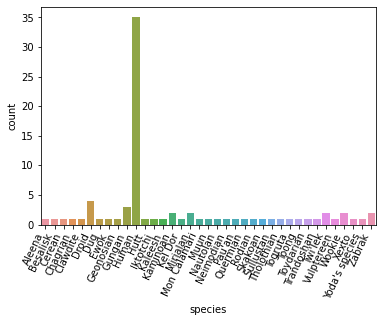

In [118]:
sns.barplot(x='species', y='count', data=species_to_count_df)
ticks = plt.xticks(rotation=65, ha='right')

There are many species within this, however, many of the counts are just 1. SO, for the sake of being able to run anything machine learning on this, we'll need to remove them!

In [123]:
more_than_two_counts_df = species_to_count_df[ species_to_count_df['count'] > 1 ]
more_than_two_counts_df

,species,count
5,Droid,4
9,Gungan,3
10,Human,35
14,Kaminoan,2
16,Mirialan,2
31,Twi'lek,2
33,Wookie,2
36,Zabrak,2


In [126]:
multiple_species_list = more_than_two_counts_df['species'].values
multiple_species_list

array(['Droid', 'Gungan', 'Human', 'Kaminoan', 'Mirialan', "Twi'lek",
       'Wookie', 'Zabrak'], dtype=object)

In [176]:
cleaned_ml_df_mask = ml_df_no_unknowns['species'].isin(multiple_species_list)
cleaned_ml_df = ml_df_no_unknowns[ cleaned_ml_df_mask ].copy()


for col in cleaned_ml_df.columns[1:]:
    cleaned_ml_df[col] = cleaned_ml_df[col].astype("category")


Now that we've fully cleaned our data, let's see if we can predict our species! 

It is common place to split your data into X matrices and y vectors:

In [250]:
x_values = ['height', 'hair_color', 'skin_color', 'eye_color', 'gender']
y_value = [ 'species' ]
X = cleaned_ml_df[ x_values ]
y = cleaned_ml_df[ y_value ] 

Let's now split our data into a train/test split: 

In [178]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Now that we've split our data into a train set and a testing set, let's check to make sure everything looks alright: 

In [185]:
import seaborn as sns

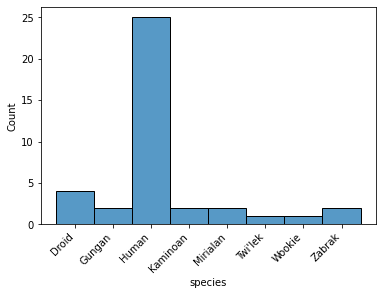

In [186]:
sns.histplot(data=y_train, x='species')
ticks = plt.xticks(rotation=45, ha='right')


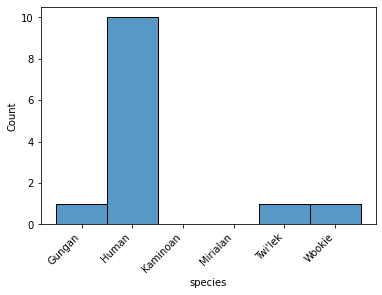

In [187]:
sns.histplot(data=y_test, x='species')
ticks = plt.xticks(rotation=45, ha='right')


In the above two plots, we can see that we're not splitting our data based on the y vector distributions. 

We _could_ ignore this and just run with it, however, we'll then not be able to train our model on the actual data. SO, let's instead try to create a better distribution for our training and testing sets. We can do this wih the stratify parameter:

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y['species'], test_size = 0.5)

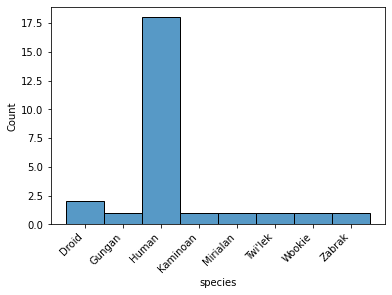

In [189]:
sns.histplot(data=y_train, x='species')
ticks = plt.xticks(rotation=45, ha='right')

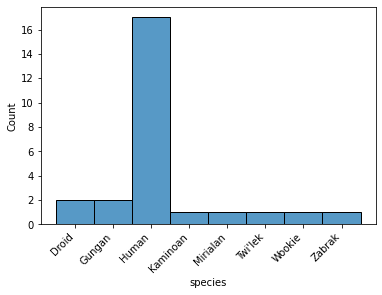

In [190]:
sns.histplot(data=y_test, x='species')
ticks = plt.xticks(rotation=45, ha='right')

## Fitting the Tree

In [191]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)

ValueError: could not convert string to float: 'none'

What just happened?? The above error is happening because we've tried to pass in string data. Many machine learning models specifically require that we pass in _only_ numerical data. 

We can do this in a number of ways. Firstly, we could numerically give each one of our values within our features a numerical key

In [193]:
X_train['hair_color']

44             none
26           auburn
23            black
71             none
9     auburn, white
63            black
6             brown
64            brown
19             grey
13            brown
73             none
42             none
2               n/a
34             none
67            black
24             none
58            black
20            black
11     auburn, grey
7               n/a
0             blond
60            brown
33            brown
30            brown
78            brown
79            brown
Name: hair_color, dtype: category
Categories (11, object): ['auburn', 'auburn, grey', 'auburn, white', 'black', ..., 'grey', 'n/a', 'none', 'white']

/Users/96v/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


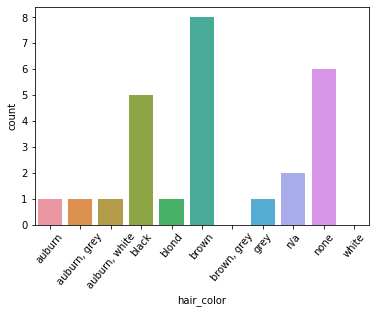

In [199]:
sns.countplot(X_train['hair_color'])
ticks = plt.xticks(rotation=50)

Let's take the next minute to assign categorical index values to our data:  

In [213]:
def create_category_map(df, column): 
    categories = df[column].cat.categories
    category_map = {}
    map_val = 0
    for category in categories:
        category_map[ category ] = map_val
        
        map_val = map_val + 1
        
    return category_map

In [214]:
for column in X.columns[1:]: 
    category_map = create_category_map(X, column)
    
    X.loc[:, column] = X[column].apply(lambda x: category_map[x])

/var/folders/3g/0q_1cdr55qsgk59qbrs83m78dw2x85/T/ipykernel_70852/476851615.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, column] = X[column].apply(lambda x: category_map[x])
/var/folders/3g/0q_1cdr55qsgk59qbrs83m78dw2x85/T/ipykernel_70852/476851615.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, column] = X[column].apply(lambda x: category_map[x])
/var/folders/3g/0q_1cdr55qsgk59qbrs83m78dw2x85/T/ipykernel_70852/476851615.py:4: SettingWithCopyWarning: 
A value is trying to be set 

Now, let's try this again: 

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y['species'], test_size = 0.5)
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [237]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()


AttributeError: 'DataFrame' object has no attribute 'cat'

In [257]:
y['species'].cat.cat

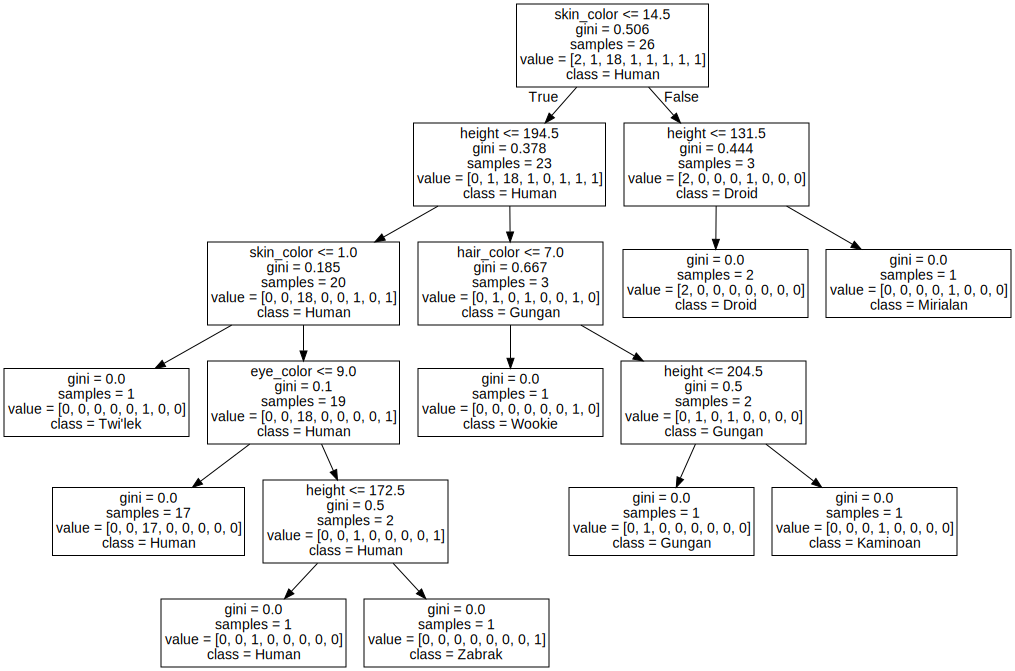

In [259]:
import graphviz
dot_data = tree.export_graphviz(classifier, out_file=None, feature_names = X.columns, class_names=y['species'].cat.categories) 
graph = graphviz.Source(dot_data)
graph

In the above tree, we can see exactly how our tree splits the data! 


### Accuracy Metrics
Now let's calculate the accuracy. To do so, we'll need to take our test X and predict what species come from it:

In [260]:
y_predicted = classifier.predict(X_test)

Now that we have our predictions, we can finally test the of our predictions against the ground truth that we have from our data! 

In [261]:
from sklearn.metrics import accuracy_score

In [262]:
accuracy_score(y_test, y_predicted)

0.7307692307692307